# Работы с регулярными выражениями

## Databases

1. Найдите сотрудников, у которых имя начинается с одной из букв (A,F,R,T)
2. Найдите сотрудников, у которых в имени есть хотя бы одна из букв (a,f,r,t) в любом регистре
3. Найдите сотрудников, у которых в имени две заглавные буквы подряд


In [ ]:
--1
select * 
from employees e 
where first_name ~ '^[AFRT]'; 

--2
select * 
from employees e 
where first_name ~ '[afrtAFRT]'; 

--3
select * 
from employees e 
where first_name ~ '[A-Z]{2}'; -- first_name ~ '[A-Z][A-Z]'

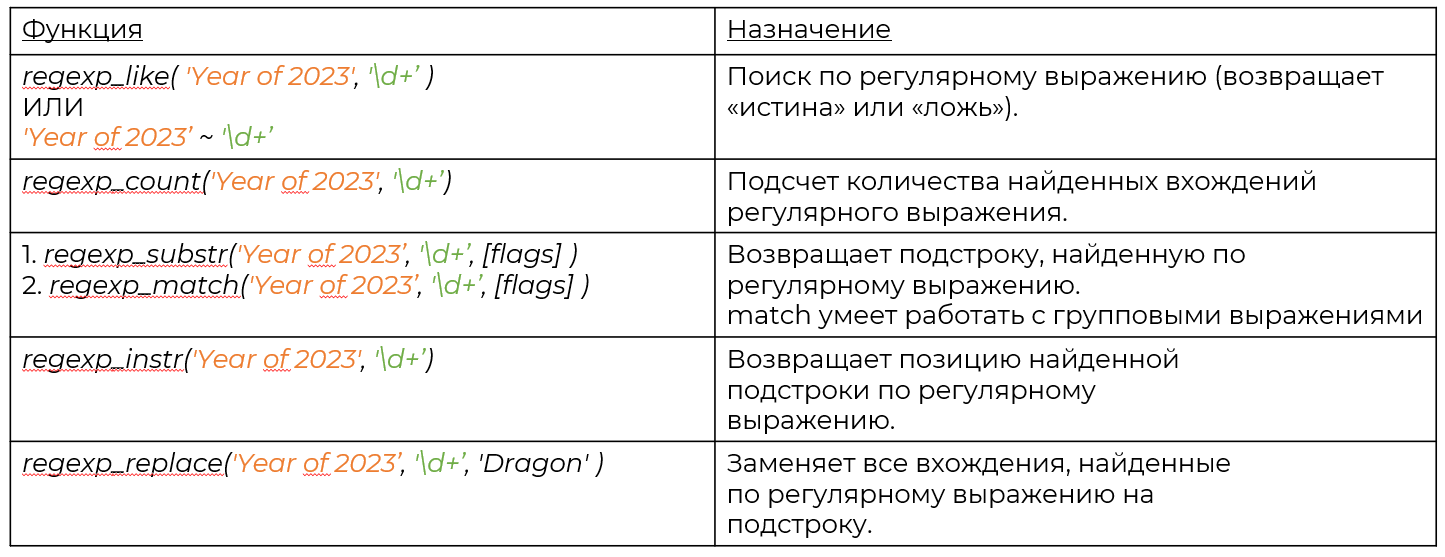

SQLite нативно НЕ поддерживает регулярные выражение, требуется установка `sqlean-regexp` - https://github.com/nalgeon/sqlean/tree/main .\
В этом случае синтаксис будет следующим:

*SELECT * FROM table WHERE column_name REGEXP '^abc';*


Потренеруемся

1. Таблица employees. Выведите только те записи, в которых номер телефона имеет формат XXX.XXX.XXXX

In [ ]:
select *
from employees e 
where regexp_like(phone_number, '^\d{3}\.\d{3}\.\d{4}$');

2. Маскируйте найденные номера телефонов шаблоном XXX.XXX.XXXX

In [ ]:
select phone_number, regexp_replace(phone_number, '^\d{3}\.\d{3}\.\d{4}$', 'XXX.XXX.XXXX') 
from employees e 

3. На примере работы с номерами телефонов выясните в чем разица между regexp_substr, regexp_match и regexp_matches

In [ ]:
select phone_number, regexp_match(phone_number, '(\d+)[.](\d+)[.](\d+)') 
from employees e 

## Python

### Доступные функции

Для работы с регулярными выражениями в Python используется модуль `re`. Вот некоторые из доступных в нем функций:

1. Функция `search` ищет в строке `string` первую строчку, подходящую под шаблон `pattern`:\
\
*re.search(pattern, string)*	


In [1]:
import re 

pattern = r'\d\d\D\d\d'
string = r'Телефон 123-12-12'

match = re.search(pattern, string) 
print(match)
print(match[0] if match else 'Not found', end = "\n\n") 

string = r'Телефон 1231212'

match = re.search(pattern, string) 
print(match)
print(match[0] if match else 'Not found') 


<re.Match object; span=(9, 14), match='23-12'>
23-12

None
Not found


2. Функция `fullmatch` проверяет, подходит ли строка `string` под шаблон `pattern`:\
\
*re.fullmatch(pattern, string)*

In [7]:
import re 

pattern = r'\d\d\D\d\d'
string = r'12-12'

match = re.fullmatch(pattern, string) 
print(match)
print('YES' if match[0] else 'NO', end = "\n\n") 

string = r'1212'

match = re.fullmatch(pattern, string) 
print(match)
print('YES' if match else 'NO') 


<re.Match object; span=(0, 5), match='12-12'>
YES

None
NO


3. Функция `split` разбивает строку `string` на элементы списка, в качестве разделителя используется `pattern`:\
\
*re.split(pattern, string)*

In [10]:
import re 

pattern = r'\W+'
string = 'Эта строка,честно-говоря, будет разбита по не буквенным символам!Круто!?'

splitted_str = re.split(pattern, string)

print(splitted_str)


['Эта', 'строка', 'честно', 'говоря', 'будет', 'разбита', 'по', 'не', 'буквенным', 'символам', 'Круто', '']


4. Функция `findall` поможет найти в строке `string` все непересекающиеся шаблоны `pattern` и вернет список результатов:\
\
*re.findall(pattern, string)*

In [12]:
import re

pattern = r'\d\d[./]\d\d[./]\d{4}'
string = 'Эта строка содежит несколько дат. Перавая - 15.02.1991, а вторая - 16.08.2014'

rslt = re.findall(pattern, string)

print(rslt, end="\n\n")

string = 'Эта строка содежит несколько дат. Перавая - 15/02/1991, а вторая - 16/08/2014'

rslt = re.findall(pattern, string)

print(rslt)

['15.02.1991', '16.08.2014']

['15/02/1991', '16/08/2014']


5. Функция `finditer` вернет итератор по всем непересекающимся шаблонам `pattern` в строке `string`:\
\
*re.finditer(pattern, string)*

In [13]:
import re

pattern = r'\d\d\.\d\d\.\d{4}'
string = 'Эта строка содежит несколько дат. Перавая - 15.02.1991, а вторая - 16.08.2014. И снова 15.02.1991'

print(re.finditer(pattern, string))

for m in re.finditer(pattern, string): 
    print(m)
    print('Дата', m[0], 'содержится в строке в интервале', m.span(), end="\n\n") 


<re.Match object; span=(44, 54), match='15.02.1991'>
Дата 15.02.1991 содержится в строке в интервале (44, 54)

<re.Match object; span=(67, 77), match='16.08.2014'>
Дата 16.08.2014 содержится в строке в интервале (67, 77)

<re.Match object; span=(87, 97), match='15.02.1991'>
Дата 15.02.1991 содержится в строке в интервале (87, 97)



6. Функция `sub` заменит в строке `string` все непересекающиеся шаблоны `pattern` на `repl`:\
\
*re.sub(pattern, repl, string, count=0)*\
\
Может быть особенно удобна для маскирования данных

In [14]:
import re

pattern = r'\d\d\.\d\d\.\d{4}'
string = 'Эта строка содежит несколько дат. Перавая - 15.02.1991, а вторая - 16.08.2014. И снова 15.02.1991'

rslt = re.sub(pattern, 'DD.MM.YYYY', string)

print(string)
print(rslt)

Эта строка содежит несколько дат. Перавая - 15.02.1991, а вторая - 16.08.2014. И снова 15.02.1991
Эта строка содежит несколько дат. Перавая - DD.MM.YYYY, а вторая - DD.MM.YYYY. И снова DD.MM.YYYY


### Экранирование

В Python \ экранирует специальные символы (например сам \\). То есть \\\\\\\ в Python - означает просто \\\

Сам "движок" регулярных выражений также использует \  в качестве символа экранирования. 

Таким образом, внутри "движка" регулярных выражений в Python \\\\\\\ означают просто \\

In [16]:
import re

pattern = '\\\\' # слишком мало экранов!
string = 'C:\\some\\name'

print(string)

rslt = re.split(pattern, string)

print(rslt)



C:\some\name
['C:', 'some', 'name']


Чтобы упростить себе жизнь используйте r-строки (как минимум в шаблонах регулярных выражений):

In [26]:
import re

pattern = r'\\' # НО! экранировать \ внутри движка регулярных выражений все равно надо!
string = r'C:\\some\\name' # сколько элементов будет содержать итоговый список, если сделать эту строку r-строкой?

print(string)

rslt = re.split(pattern, string)

print(rslt)

C:\\some\\name
['C:', '', 'some', '', 'name']


Во все описанные функции можно передать дополнительный атрибут `flags`, который может принимать одно из следующих значений:
* re.ASCII - убирает из строки те unicode символы, которые не лежат внутри ascii

In [28]:
import re 

print(re.findall(r'\d+', '12 + ٦٧')) 
print(re.findall(r'\d+', '12 + ٦٧', flags=re.ASCII))

print(re.findall(r'\w+', 'Hello, мир!')) 
print(re.findall(r'\w+', 'Hello, мир!', flags=re.ASCII)) 


['12', '٦٧']
['12']
['Hello', 'мир']
['Hello']


* re.IGNORECASE - игнорирует регистр при поиске в строке

In [29]:
import re 

print(re.findall(r'[оаРыя]+', 'ОООО ааааа ррррр ЫЫЫЫ яяяя')) 
print(re.findall(r'[оаРыя]+', 'ОООО ааааа ррррр ЫЫЫЫ яяяя', flags=re.IGNORECASE)) 


['ааааа', 'яяяя']
['ОООО', 'ааааа', 'ррррр', 'ЫЫЫЫ', 'яяяя']


In [31]:
print(r"Test\\")

Test\\


* re.DOTALL - позволяет использовать точку (.) в шаблоне регулярного выражения в качестве чего угодно (например, переноса строки)
* re.MULTILINE - позволяют использовать символы ^ и $ не для всего текста, а для каждой строки текста по отдельности

In [37]:
import re 

text = r""" 
Торт
с вишней1 
вишней2 
""" 
print(re.findall(r'Торт.с', text)) 
print(re.findall(r'Торт.с', text, flags=re.DOTALL)) 
print(re.findall(r'^виш\w+', text))
print(re.findall(r'виш\w+', text) )
print(re.findall(r'^виш\w+', text, flags=re.MULTILINE)) 


[]
['Торт\nс']
[]
['вишней1', 'вишней2']
['вишней2']


### Группировки и перечисления

Повторяющиеся элементы регулярного выражения можно группировать с помощью `()`

Рассмотрим пример с сетевым IP-адресом 6-версии (IPv6). \
Он имеет вид вроде: 2001:0db8:85a3:0000:0000:8a2e:0370:7334

In [38]:
import re 

pattern = r'[0-9a-z]{4}:[0-9a-z]{4}:[0-9a-z]{4}:[0-9a-z]{4}:[0-9a-z]{4}:[0-9a-z]{4}:[0-9a-z]{4}:[0-9a-z]{4}'
string = r'Мой IP адрес - 2001:0db8:85a3:0000:0000:8a2e:0370:7334'

match = re.search(pattern, string) 
lst = re.findall(pattern, string) 
print(match)
print(lst)

<re.Match object; span=(15, 54), match='2001:0db8:85a3:0000:0000:8a2e:0370:7334'>
['2001:0db8:85a3:0000:0000:8a2e:0370:7334']


Видим повторяющиеся элементы и собираем их в группы:

In [ ]:
import re 

pattern = r'[0-9a-z]{4}(:[0-9a-z]{4}){7}'
string = r'Мой IP адрес - 2001:0db8:85a3:0000:0000:8a2e:0370:7334'

match = re.search(pattern, string) 
lst = re.findall(pattern, string) 
print(match)
print(lst)

<re.Match object; span=(15, 54), match='2001:0db8:85a3:0000:0000:8a2e:0370:7334'>
[':7334']


Почему поведение разное? Ведь шаблон поиска регулярного выражения одинаков!

Все дело в механике работы функции `search` и `fullmatch`. Они возвращают не просто найденный текст, но объект `match`, из которого можно достать много полезной информации:

In [40]:
import re 

pattern = r'[0-9a-z]{4}(:[0-9a-z]{4}){7}'
string = r'Мой IP адрес - 2001:0db8:85a3:0000:0000:8a2e:0370:7334'

match = re.search(pattern, string) 
print(match)
print(match[0])
print(match[1])
print(match.group())
print(match.groups())
print(match.start())
print(match.end())

<re.Match object; span=(15, 54), match='2001:0db8:85a3:0000:0000:8a2e:0370:7334'>
2001:0db8:85a3:0000:0000:8a2e:0370:7334
:7334
2001:0db8:85a3:0000:0000:8a2e:0370:7334
(':7334',)
15
54


Давайте рассмотрим пример понагляднее:

In [42]:
pattern = r'\s*([А-Яа-яЁё]+)(\d+)\s*' 
string = r'---   Опять25   ---' 
match = re.search(pattern, string) 

print(match) 
print(f'{match[0]} - с индекса {match.start(0)} до {match.end(0)}') 
print(f'{match[1]} - с индекса {match.start(1)} до {match.end(1)}') 
print(f'{match[2]} - с индекса {match.start(2)} до {match.end(2)}') 

print()
print(match.group())
print(match.groups())

<re.Match object; span=(3, 16), match='   Опять25   '>
   Опять25    - с индекса 3 до 16
Опять - с индекса 6 до 11
25 - с индекса 11 до 13

   Опять25   
('Опять', '25')


Теперь вернемся к примеру с IPv6:

In [43]:
import re 

pattern = r'[0-9a-z]{4}(:[0-9a-z]{4}){7}'
string = r'Мой IP адрес - 2001:0db8:85a3:0000:0000:8a2e:0370:7334'

match = re.search(pattern, string) 
lst = re.findall(pattern, string) 

print(match)
print(match.groups())
print(lst)

<re.Match object; span=(15, 54), match='2001:0db8:85a3:0000:0000:8a2e:0370:7334'>
(':7334',)
[':7334']


Избежать такого поведения можно.\
Чтобы скобки `()` не становились группирующими стоит использовать формат `(?:)`:

In [45]:
import re 

pattern = r'[0-9a-z]{4}(?::[0-9a-z]{4}){7}'
string = r'Мой IP адрес - 2001:0db8:85a3:0000:0000:8a2e:0370:7334, 2001:0db8:85a3:0000:0000:8a2e:0370:7334, 2001:0db8:85a3:0000:0000:8a2e:0370:7334'

match = re.search(pattern, string) 
lst = re.findall(pattern, string) 

print(match)
print(match.groups())
print(lst)

<re.Match object; span=(15, 54), match='2001:0db8:85a3:0000:0000:8a2e:0370:7334'>
()
['2001:0db8:85a3:0000:0000:8a2e:0370:7334', '2001:0db8:85a3:0000:0000:8a2e:0370:7334', '2001:0db8:85a3:0000:0000:8a2e:0370:7334']


Теперь познакомимся с перечислением `|`\
Попробуем найти все телефонные номера с тексте.\
Решение в лоб:

In [46]:
import re 

pattern = r'[78]-[0-9]{3}-[0-9]{3}-[0-9]{2}-[0-9]{2}'
string = r'Вот мои любимые телефонные номера: +7-911-111-22-33 и 8-917-765-44-32'

lst = re.findall(pattern, string) 
print(lst)

['7-911-111-22-33', '8-917-765-44-32']


Сокращаем его с помощью группировки:

In [47]:
import re 

pattern = r'[78](?:-\d{2,3}){4}'
string = r'Вот мои любимые телефонные номера: +7-911-111-22-33 и 8-917-765-44-32'

lst = re.findall(pattern, string) 
print(lst)

['7-911-111-22-33', '8-917-765-44-32']


Улучшаем с помощью перечисления `|`:

In [48]:
import re 

pattern = r'(?:\+7|8)(?:-\d{2,3}){4}'
string = r'Вот мои любимые телефонные номера: +7-911-111-22-33 и 8-917-765-44-32'

lst = re.findall(pattern, string) 
print(lst)

['+7-911-111-22-33', '8-917-765-44-32']


Давайте разберем еще несколько тонкостей, связанных с группировкой.

1) Вложенные группировки:

In [49]:
pattern = r'(\d)((\d)(\d))((\d)(\d))(\d)' 
string = r'123456789' 
match = re.search(pattern, string) 

print(match, end='\n\n')
print(match.groups(), end='\n\n')


<re.Match object; span=(0, 6), match='123456'>

('1', '23', '2', '3', '45', '4', '5', '6')



2) Группировки с `findall`.\
Использование простой группировки может оказаться полезным в некоторых случаях.\
К примеру, вы хотите не просто найти email адреса в тексте, но и сразу разделить их на доменное имя и домены 1 и 2 уровня:

In [50]:
pattern = r'(\w+)@(\w+)\.(\w+)'
string = r'iivanov@corp1.com, ssidorov@corp2.com, some_bad_email, epetrova@corp1.ru'

lst = re.findall(pattern, string)

print(lst)


[('iivanov', 'corp1', 'com'), ('ssidorov', 'corp2', 'com'), ('epetrova', 'corp1', 'ru')]


3) Группировки и `split`.\
Добавление группирующих скобок в split сильно меняет поведение функции.\
Допустим есть математический пример, который необходимо разделить на операторы и операнды:

In [51]:
pattern = r'(\s*)([+*/-])(\s*)'
string = r'12  +  13*15   - 6'

lst = re.split(pattern, string)

print(lst)

['12', '  ', '+', '  ', '13', '', '*', '', '15', '   ', '-', ' ', '6']


In [52]:
pattern = r'\s*([+*/-])\s*'
string = r'12  +  13*15   - 6'

lst = re.split(pattern, string)

print(lst)

['12', '+', '13', '*', '15', '-', '6']


4. При использовании функции `re.sub` на группы регулярного выражения можно ссылаться с помощью \1, \2 и тд.\
Это позволяет, к примеру, переставлять части найденного шаблона местами:

In [ ]:
text = "Вот эту дату нужно перевести в привычный нам формат записи: 02/15/1991." 

print(re.sub(r'(\d\d)/(\d\d)/(\d{4})', r'\2.\1.\3', text)) 

Вот эту дату нужно перевести в привычный нам формат записи: 15.02.1991.


* Если групп больше 9, то используйте запись: `\g<12>`

### Более сложные шаблоны (для ознакомления)

1. `(?=...)` - каждая позиция, сразу после которой начинается соответствие шаблону.

In [ ]:
pattern = r'.*Винни(?= Пух).*'
string = r'''
У Винни Пуха множество друзей! 
Винни любит ходить к ним в гости, 
ведь друзья угощают Пуха вкусным медом!
'''

lst = re.findall(pattern, string)

print(lst)

2. `(?!...)` - каждая позиция, сразу после которой НЕ начинается соответствие шаблону.

In [ ]:
pattern = r'.*Винни(?! Пух).*'
string = r'''
У Винни Пуха множество друзей! 
Винни любит ходить к ним в гости, 
ведь друзья угощают Пуха вкусным медом!
'''

lst = re.findall(pattern, string)

print(lst)

3. `(?<=...)` - каждая позиция, которой может заканчиваться шаблон.\
`(?<!...)` - - каждая позиция, которой НЕ может заканчиваться шаблон.\
**Важно:** длина шаблона должна быть фиксирована!\

In [ ]:
pattern = r'(?<= Пуха).*'
string = r'''
У Винни Пуха множество друзей! 
Винни любит ходить к ним в гости, 
ведь друзья угощают Пуха вкусным медом!
'''

lst = re.findall(pattern, string)

print(lst)

Эти приемы можно комбинировать между собой, чтобы получать интересный эффект:

In [ ]:
# найдем все цифры, которые окружены НЕ цифрами
pattern = r'(?<!\d)\d(?!\d)'
string = r'''
У Винни Пуха 777 множество друзей! 
Винни любит ходить к ним в гости, 
ведь друзья у1г2о33щ44а5ю6т Пуха вкусным 888 медом!
'''

lst = re.findall(pattern, string)

print(lst)

In [ ]:
# найдем все соответствия между началом и окончанием заданных шаблонов
pattern = r'(?<=<НАЧАЛО>).*(?=<КОНЕЦ>)'
string = r'''
У Винни Пуха множество друзей! 
Винни любит ходить <НАЧАЛО>тут сектерное сообщение<КОНЕЦ> к ним в гости, 
ведь друзья <НАЧАЛО>тут еще одно сектерное сообщение<КОНЕЦ> угощают Пуха вкусным медом!
'''

lst = re.findall(pattern, string)

print(lst)

## Unix

В Unix системах регулярные выражения поддерживаются нативно во многих базовых командах, таких как:
* grep
* find
* sed
* И тд.

Попробуем их применить

1. Пусть есть файл с телефонными номерами:\
(185) 136-1035\
(95) 213-1874\
(37) 207-2639\
(285) 227-1602\
(275) 298-1043\
(107) 204-2197\
(799) 240-1839\
(218) 750-7390\
(114) 776-2276\
(7012) 219-3089\
\
Найдем телефонные номера, которые не соответствуют шаблону: (XXX) XXX-XXXX

In [ ]:
grep -Ev '^\([0-9]{3}) [0-9]{3}-[0-9]{4}$' <file>

ключ -E включает расширенный функционал работы с регулярными выражениями\
ключ -v находит все строки, которые НЕ соответствуют шаблону поиска

2. Попробуем применить регулярку с другой командой.\
\
Найдем в директории имена файлов и каталогов, содержащие пробелы и другие, потенциально вредные символы.

In [ ]:
find <directory> -regex '.*[^-_./0-9a-zA-Z].*'

## Ответственность

**Важно помнить:**
* Применяйте регурялки только там, где это действительно необходимо (например, не стоит использовать регулярки для парсинга файлов формата XML, HTML и тд.)
* Плохо написанное регулярное выражение снижает производительность
* Регулярные выражения как правило write-only

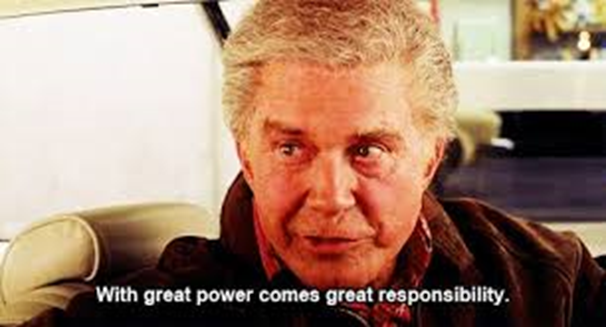

## Практическа часть

### Задача 1

Работая внутри базы данных определите департаменты, в названии которых не более двух слов

### Задача 2

Распознайте, является ли переданная строка корректным автомобильным номером:
* буква + 3 цифры + 2 буквы + 2 или 3 цифры
* буквы могут быть только из числа А, В, Е, К, М, Н, О, Р, С, Т, У и Х
* номер может быть передан в любом регистре